<a href="https://colab.research.google.com/github/kyleegit27/trees/blob/main/ML_trees_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q1, Q2, Q5

Question 1

1.1 How are trees constructed?
It is a model that recursively splits the data for the purpose of minimizing the difference in outcomes at the end of the paths. It is made of decision nodes, choices and terminal nodes.

1.2 How do trees handle non-linear relationships between variables? Compare this to linear models.
Trees are good at expressing non-linear relationships between variables compared to linear models. Linear models assume a linear relationship between variables and do not express non-linear relationships well. Since trees split based on patterns, they can more easily capture complex relationships.

1.3 Why is the Gini a good loss function for categorical target variables?
The Gini Impurity is a good loss function specifically for categorical target variables because it quantifies the liklihood of misclassification. This means the method favors more homogenous outcomes, which is the goal of the tree. Overall, this provides information to determine the most optimal split.

1.4 Why do trees tend to overfit, and how can this tendency be constrained?
Trees to tend to overfit because of unrestricted growth, which means the tree can grow until each leaf has one pure outcome. They can also assign high importance to noise or irrelevant features that will overfit the model.
Overfitting can be constrained by imposing a few different arguments in the model such as min_impurity_decrease, min_samples_leaf, and max_depth. These are some early stopping rules, which is a form of regularization to prevent overfitting.

1.5 True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
False, the example we had in class about classifying the animal species did not have many features/covariates, but performed well. Trees can be used for a small or large range of categorical variables. But, it's important to keep in mind that trees are prone to overfitting, so constraints are important espeically when they are many features.

1.6 Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
CART is typically designed to do binary splits from a recursive binary partitioning process that splits data from nodes into two pure leafs from that point.

1.7 What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
Using heuristics, you can just look at the tree size and outcomes of the terminal nodes. If there are a ton of splits and the terminal nodes each have one pure outcome in them, then that is clearly an overfit model. Converseley, if there aren't many splits at all for a complex data set and the terminal nodes have non-homogenous outcomes within each leaf, then that likely indicates underfitting.


Q2. This is a case study on regression and classification trees.

2.1 Load ./data/cars_hw.csv. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2.2 For the categorical variables Make, Color, Body_type, No_of_Owners, Fuel_Type, Transmission, and Transmission_Type, create dummy/one-hot-encoded representations. For numeric variables, we'll use Mileage_Run, Make_Year, and Seating_Capacity. Our target variable will be Price. Make a train-test split of your data.

2.3 From sklearn.tree, import the DecisionTreeRegressor and plot_tree. Use a train-test split to iterate over possible values for min_samples_leaf, computing the
 for each value between 1 and 25. What choice achieves the highest
 on the test data?

2.4 For the optimal min_samples_leaf from 3, regress price on the rest of the features/covariates using the training data. What is your
 and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

2.5 Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

2.6 Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [14]:
#modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LinearRegression


In [3]:
! git clone https://github.com/kyleegit27/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 102 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 11.99 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [5]:
#Q2.1
cars = pd.read_csv('/content/trees/assignment/data/cars_hw.csv')
cars.head()
cars.shape #976 observations, 12 covariates

(976, 12)

In [6]:
#2.2 create dummy vars for categorical features, make train test split of data

y = cars['Price']
#dummy vars
make_dummy = pd.get_dummies(cars['Make'])
color_dummy = pd.get_dummies(cars['Color'])
owners_dummy = pd.get_dummies(cars['Body_Type'])
fuel_dummy = pd.get_dummies(cars['Fuel_Type'])
trans_dummy = pd.get_dummies(cars['Transmission'])
type_dummy = pd.get_dummies(cars['Transmission_Type'])

num_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

X = pd.concat([cars.loc[:, num_vars], make_dummy, color_dummy, owners_dummy, fuel_dummy, trans_dummy, type_dummy], axis = 1)

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)




In [ ]:






# Better residual plot
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Optionally: log transform if residuals are skewed


Best R-squared:  0.8870 with min_samples_leaf = 1


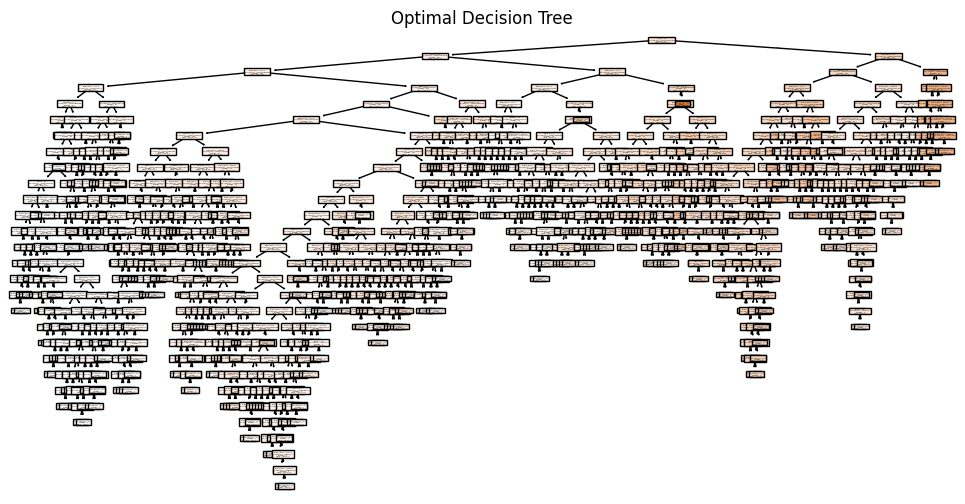

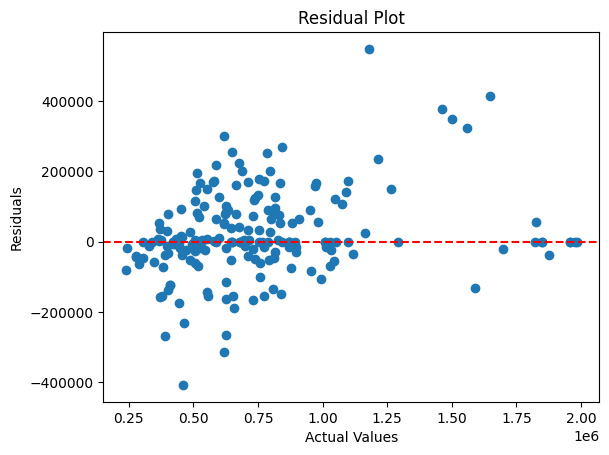

In [10]:
#2.3, 1.4 use min_samples_leaf regularization for overfitting constraint, which values achieves the highest
#possibly also answering 1.4

#From sklearn.tree, import the DecisionTreeRegressor and plot_tree.
#Use a train-test split to iterate over possible values for min_samples_leaf,
#computing the for each value between 1 and 25. What choice achieves the highest on the test data?


#creating list of rsq to determine highest accuracy sample leaf
rsq_list = []
best_rsq = float('-inf')
best_leaf = 1
best_model = None

#test 1-25 for loop to find leaf sample with highest testing accuracy
for leaf in range(1,26):
  cart = DecisionTreeRegressor(min_samples_leaf = leaf, random_state = 42)#regularization
  cart.fit(X_train, y_train)#classifier
  rsq = cart.score(X_test, y_test)
  rsq_list.append(rsq)

  if rsq > best_rsq:
    best_rsq = rsq
    best_leaf = leaf
    best_model = cart

print(f'Best R-squared: {best_rsq: .4f} with min_samples_leaf = {best_leaf}')

#visualize the best tree
plt.figure(figsize = (12, 6))
plot_tree(best_model, filled = True, feature_names = best_model.feature_names_in_)
plt.title("Optimal Decision Tree")
plt.show()


#residuals
y_hat = best_model.predict(X_test)
residuals = y_test -y_hat

#residual plot
plt.scatter(y_test, residuals)
plt.axhline(0, color = 'red', linestyle = '--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


#high achieves highest on test data?


Rsq :  0.8882279142744892 



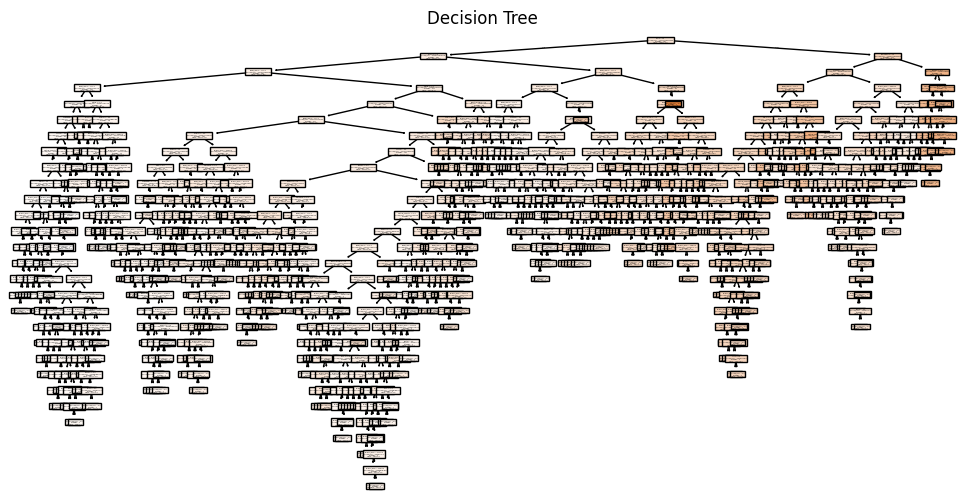

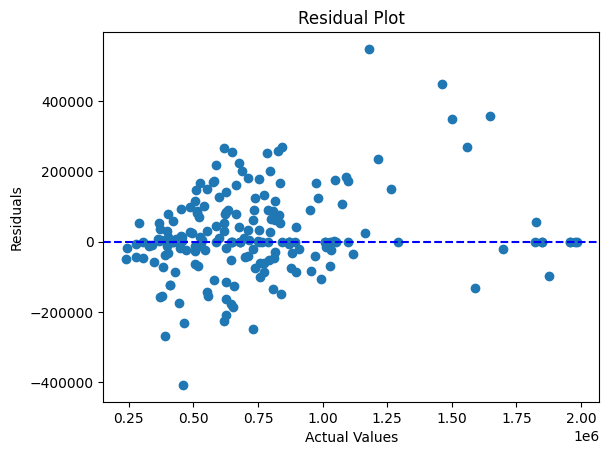

In [13]:
#2.4 For the optimal min_samples_leaf from 3, regress price on the rest of the features/covariates using the training data.
#What is your and RMSE on the test set? Plot the dendrogram.
#Plot the residuals. Is the density of residuals symmetric and centered around 0?


cart = DecisionTreeRegressor(min_samples_leaf = 1, random_state = 100)

#predictions on test set
cart = cart.fit(X_train, y_train)#fit classifier
y_hat = cart.predict(X_test)
print('Rsq : ', cart.score(X_test, y_test), '\n')
residuals = y_test - y_hat

#visualize results
plt.figure(figsize= (12, 6))
var_names = cart.feature_names_in_
plot_tree(cart, filled = True, feature_names = var_names)
plt.title("Decision Tree")
plt.show()

#plot residuals - density
plt.scatter(y_test, residuals)
plt.axhline(0, color = 'blue', linestyle = '--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#Yes, the density of the residuals are symmetric and centered around zero.

In [21]:
cars.columns

cars['Age'] = max(cars['Price'])-cars['Price']


Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price', 'Price_t', 'Age'],
      dtype='object')

In [23]:
#2.5 Run a linear regression of price on the same variables.
#Which model -- regression tree or linear regression -- performs better on the test set? Why?


#use interactions/powers to account for non-linear relationships

#regression with ski-kit linear models

#transformation of variables
cars['Price_t'] = np.arcsinh(cars['Price'])
cars['Mileage_t'] = np.arcsinh(cars['Mileage_Run'])
cars['Age_t'] = np.arcsinh(cars['Age'])

#target variable
y = cars['Price_t']

#squaring variables - power
#power variables of mileage and age squared
cars['Age_sq'] = cars['Age_t']**2
cars['Mileage_sq'] = cars['Mileage_t']**2

#vars including interactions to account for non-linear relationships
vars = ['Age_t', 'Age_sq', 'Mileage_t', 'Mileage_sq'] #features

#construct matrix

X = cars.loc[:, vars]
X.head()

reg = LinearRegression().fit(X, y) #fit model
print(reg.intercept_)
print(reg.coef_)
print(reg.score(X, y))#r squared measure

X = cars.loc[:,vars] # Construct data matrix
X.head() # Peek at data

#The linear regression model performs with 83% accuracy while the trees model performs with 88% accuracy. This is likely because
#trees perform better with non-linear relationships. Even though the powers and interaction variables can account for
#non-linearity in linear models, it is at the disgression of the human to decide which variables to interact, which could
#lead to higher inaccuracy and uncertainty.

17.12911174455993
[ 1.91351363 -0.13116997 -0.26840083  0.01088577]
0.8356427225014913


,Age_t,Age_sq,Mileage_t,Mileage_sq
0,15.334586,235.149529,11.398883,129.934532
1,15.323580,234.812103,10.611770,112.609654
2,15.273195,233.270483,10.986648,120.706428
3,15.435691,238.260543,11.175493,124.891639
4,15.394902,237.002994,10.824806,117.176417


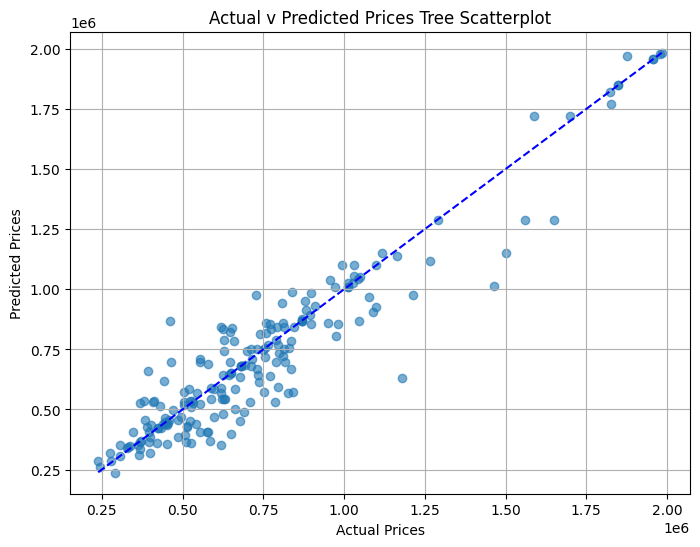

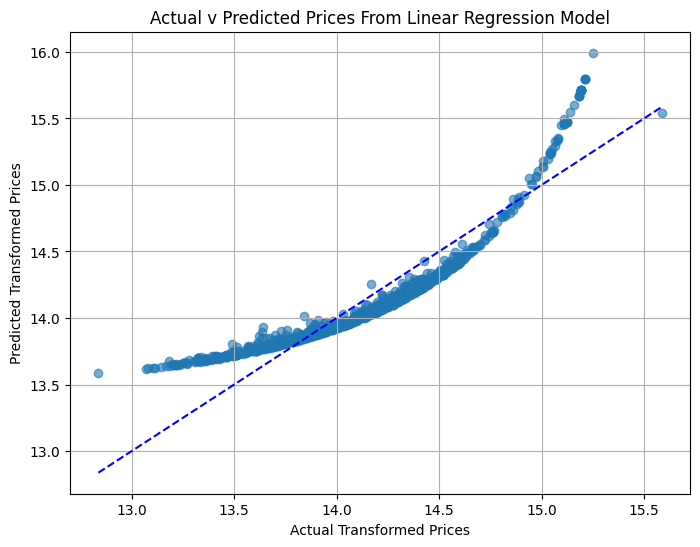

In [30]:
#2.6 Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

#tree predicted prices on test set
y_hat = cart.predict(X_test)

#scatterplot, actual v predicted for tree
plt.figure(figsize= (8,6))
plt.scatter(y_test, y_hat, alpha = 0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color= 'blue', linestyle = '--') #perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual v Predicted Prices Tree Scatterplot")
plt.grid(True)
plt.show()


#regression predicted prices on test set
y_hat = reg.predict(X)

#scatterplot
plt.figure(figsize= (8,6))
plt.scatter(y, y_hat, alpha = 0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'blue', linestyle= '--')#perfect fit line
plt.xlabel("Actual Transformed Prices")
plt.ylabel("Predicted Transformed Prices")
plt.title("Actual v Predicted Prices From Linear Regression Model")
plt.grid(True)
plt.show()

Q5. This is a case study about detecting fraud using classification trees. The goal is to predict the class variable, which is 0 for non-fraud and 1 for fraud.

5.1 Open ./data/creditcard_fraud.csv. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like V8 to protect the privacy of the clients.

5.2 Print a table of counts for the class variable and make a histogram. What percentage of transactions are fraudulent?

5.3 Drop Time and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious class imbalance problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

5.4 Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5.5 Instead of predicting fraud, predict loss: Multiple the Class variable times the Amount variable, and call it Loss. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What
 and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?

In [33]:
#5.1
#lose downloads?
file_names = ['/content/trees/assignment/data/creditcard_fraud_0.parquet', '/content/trees/assignment/data/creditcard_fraud_1.parquet', '/content/trees/assignment/data/creditcard_fraud_2.parquet', '/content/trees/assignment/data/creditcard_fraud_3.parquet', '/content/trees/assignment/data/creditcard_fraud_4.parquet', '/content/trees/assignment/data/creditcard_fraud_5.parquet',
             '/content/trees/assignment/data/creditcard_fraud_6.parquet', '/content/trees/assignment/data/creditcard_fraud_7.parquet', '/content/trees/assignment/data/creditcard_fraud_8.parquet', '/content/trees/assignment/data/creditcard_fraud_9.parquet', '/content/trees/assignment/data/creditcard_fraud_10.parquet',
             '/content/trees/assignment/data/creditcard_fraud_11.parquet', '/content/trees/assignment/data/creditcard_fraud_12.parquet', '/content/trees/assignment/data/creditcard_fraud_13.parquet' , '/content/trees/assignment/data/creditcard_fraud_14.parquet', '/content/trees/assignment/data/creditcard_fraud_15.parquet', '/content/trees/assignment/data/creditcard_fraud_16.parquet', '/content/trees/assignment/data/creditcard_fraud_17.parquet', '/content/trees/assignment/data/creditcard_fraud_18.parquet', '/content/trees/assignment/data/creditcard_fraud_19.parquet' ,
              '/content/trees/assignment/data/creditcard_fraud_20.parquet', '/content/trees/assignment/data/creditcard_fraud_21.parquet', '/content/trees/assignment/data/creditcard_fraud_22.parquet', '/content/trees/assignment/data/creditcard_fraud_23.parquet', '/content/trees/assignment/data/creditcard_fraud_24.parquet', '/content/trees/assignment/data/creditcard_fraud_25.parquet', '/content/trees/assignment/data/creditcard_fraud_26.parquet', '/content/trees/assignment/data/creditcard_fraud_27.parquet', '/content/trees/assignment/data/creditcard_fraud_28.parquet']
all_dfs = []
for k in range(29):
  df_t = pd.read_parquet(file_names[k])
  all_dfs.append(df_t)
credit = pd.concat(all_dfs,axis=0)




In [34]:
#5.1

credit.shape #284807 observations, 31 covariates
credit.head()
#credit.columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


99.82725143693798

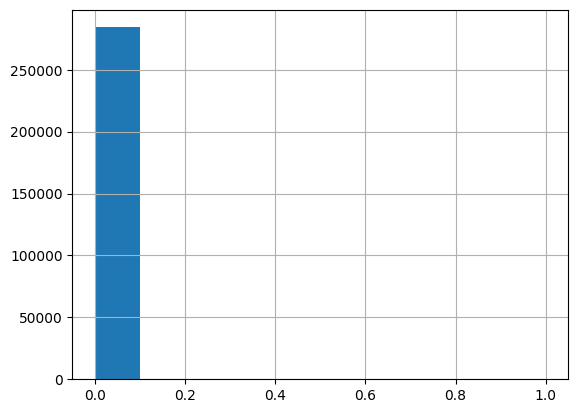

In [35]:
#5.2  table of counts for class var, histogram, percent of transactions fraudulent?

credit['Class'].value_counts() #value counts, table of counts for class outcomes

#histogram
class_hist = credit['Class'].hist()

#percent of fraudulent transactions #0 is non-fraudulent, 1 is fraud

fraud_pct = len(credit[credit['Class'] == 1])/len(credit)*100
fraud_pct #.17 percent(less than one percent) of credit card transactions in the dataset are fraud

normal_pct = len(credit[credit['Class'] ==0])/len(credit)*100
normal_pct #99.8 percent are normal

accuracy : 1.0 



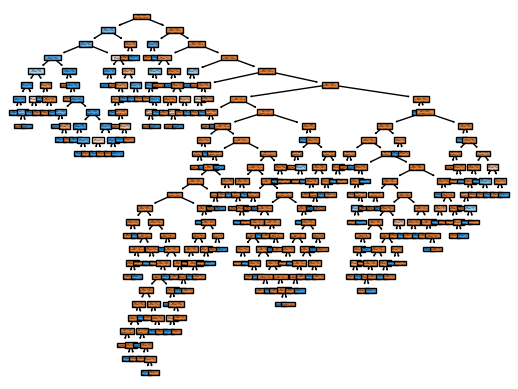

In [36]:
#5.3
'''
 Drop Time and make a decision tree classifier to predict fraud.
Print a confusion table and compute the accuracy.
'''

credit2 = credit.drop(columns = 'Time') #dropping Time column
credit2.head()

#decision tree classifier to predict fraud
y = credit2['Class']
X = credit2.drop(['Class'], axis = 1)

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


#fit decision tree
cart = DecisionTreeClassifier() #classifier object
cart = cart.fit(X, y) #fitting classifier

#predictions on test set
y_hat = cart.predict(X_test)

#visualize
var_names = cart.feature_names_in_
plot_tree(cart, filled = True, feature_names = var_names)

#confusion matrix for accuracy
cm = pd.crosstab(y_test, y_hat)
acc = np.trace(cm)/len(y_test)
print('accuracy :', acc, '\n')
#overfitting, need constraint

In [42]:
#5.4
'''Imagine that you block every transaction in the test set labelled as fraudulent.
How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers?
 Does implementing this anti-fraud system seem like a good idea, or not? Why?
'''

test_data = X_test.copy()
test_data['Actual'] = y_test
test_data['Predicted'] = y_hat

test_data['Class'] = credit2.loc[test_data.index, 'Class']
test_data['Amount'] = credit2.loc[test_data.index, 'Amount']

money_saved = test_data[(test_data['Class'] == 1)]['Amount'].sum()

#withheld in error
saved = test_data[test_data['Class'] ==1]['Amount'].sum()#saved fraud loss
withheld = test_data[test_data['Class'] ==0]['Amount'].sum()#money blocked
lost_anyway = 0

print(f"Money Saved: ${saved:,.2f}")
print(f"Money Withheld in error: ${withheld:,.2f}")
print(f"Money Lost anyway: ${lost_anyway:,.2f}")



#Implementing this anti-fraud system seems okay. It blocks all fraud, but also produces false positives, so it depends on the motives.
#But, overall I don't think this is a good system because the withheld amount far outweight the money saved.

Money Saved: $11,405.83
Money Withheld in error: $4,933,742.88
Money Lost anyway: $0.00


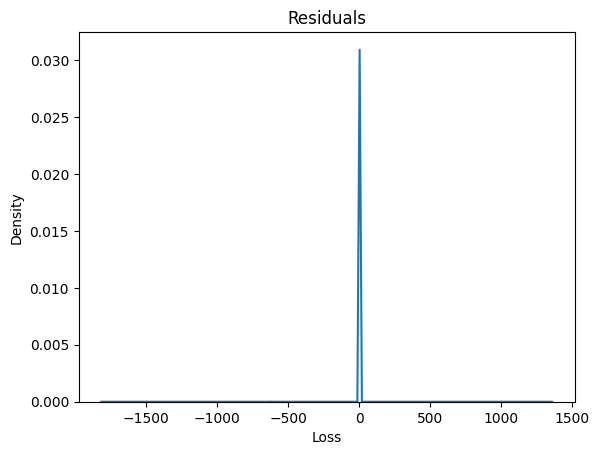

rsq :  -0.9955967186207015
rmse :  16.4012733262291


[Text(0.5, 1.0, 'Scatterplot of Precicted v Actual Values of Loss'),
 Text(0.5, 0, 'Predicted Value of Loss'),
 Text(0, 0.5, 'Actual Value of Loss')]

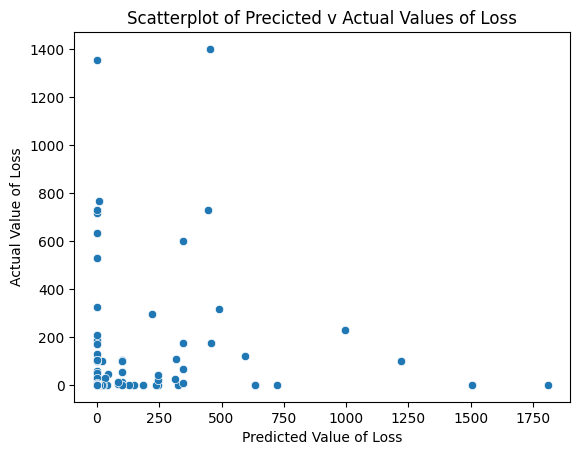

In [39]:
#5.5
'''Instead of predicting fraud, predict loss: Multiply the Class variable times the Amount variable, and call it Loss.
 Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors).
 What and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values.
  Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?
  '''

credit2['Loss'] = credit2['Amount']*credit2['Class']
credit2.head()

#predict loss using decision tree regressor
y = credit2['Loss']
X = credit2.drop(['Loss', 'Amount', 'Class'], axis = 1)

#splitting sample
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = .2, random_state = 100)

#fit model
cart = DecisionTreeRegressor()
cart = cart.fit(X_train, y_train)

#prediction
y_hat = cart.predict(X_test)


#rmse
#inverse hyperbolic sine
e = y_test -y_hat
sns.kdeplot(e).set(title = 'Residuals')
plt.show() #centered around 0?

rsq = 1-np.sum(e**2)/np.sum((y_test - np.mean(y_train))**2)
rmse = np.sqrt(np.mean(e**2))

print('rsq : ', rsq)
print('rmse : ', rmse)


#scatterplot of predicted #error?
sns.scatterplot(x = y_hat, y = y_test).set(title= 'Scatterplot of Precicted v Actual Values of Loss', xlabel = 'Predicted Value of Loss', ylabel = 'Actual Value of Loss')

#patterns, how would use algorithm
#I see on the residual plot there are some extreme outliers, but most are centered around zero.
#For the scatterplot, there is not a distinc pattern, but there is a clustering around zero and a slight negative correlation otherwise.
#This may indicate that the actual values of the loss are higher than the predicted values. I would use the algorithm to block the
#risky transactions calculated by the loss function if they are large enough to pass a certain threshold.
